<a href="https://colab.research.google.com/github/ashitoshp321-eng/Credit-Score/blob/main/Handwritten_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
import pandas as pd

# After uploading
df = pd.read_csv("/content/mnist_dataset.csv")
print(df.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0   

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32") / 255.0


In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes (digits 0–9)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.7010 - loss: 2.6295 - val_accuracy: 0.9738 - val_loss: 0.0910
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9494 - loss: 0.1735 - val_accuracy: 0.9815 - val_loss: 0.0607
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9680 - loss: 0.1120 - val_accuracy: 0.9861 - val_loss: 0.0470
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9742 - loss: 0.0893 - val_accuracy: 0.9856 - val_loss: 0.0456
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9788 - loss: 0.0727 - val_accuracy: 0.9872 - val_loss: 0.0417
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9794 - loss: 0.0666 - val_accuracy: 0.9872 - val_loss: 0.0504
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 98ms/step - accuracy: 0.9839 - loss: 0.0515 - 

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9901 - val_loss: 0.0409
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9915 - loss: 0.0273 - val_accuracy: 0.9897 - val_loss: 0.0487
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 93ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9891 - val_loss: 0.0553
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9935 - loss: 0.0227 - val_accuracy: 0.9894 - val_loss: 0.0469
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9901 - val_loss: 0.0480
Test Accuracy: 99.01%


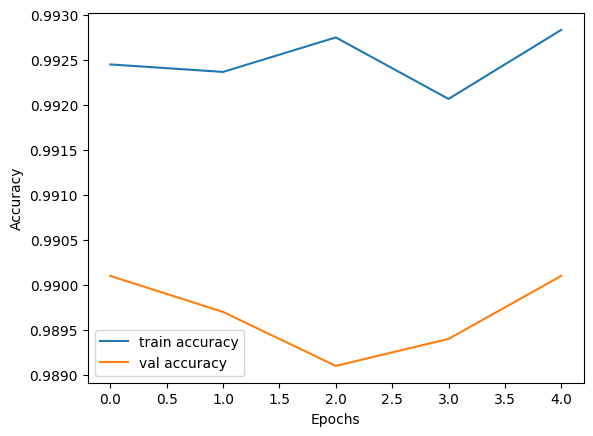

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


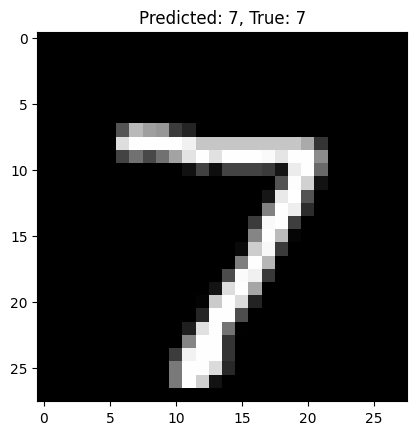

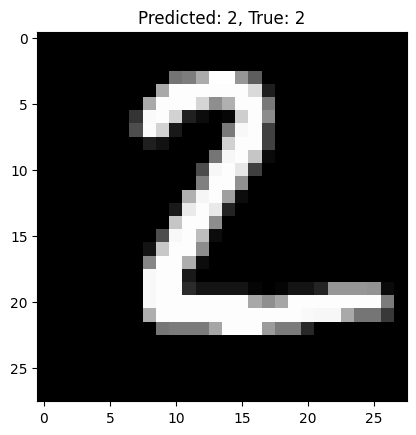

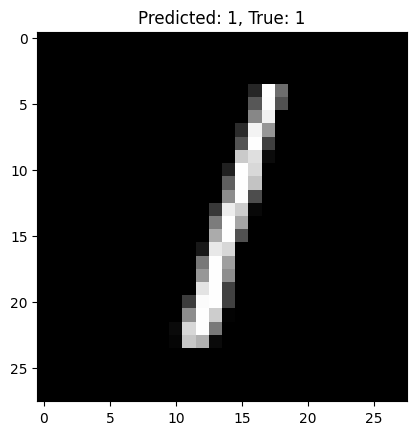

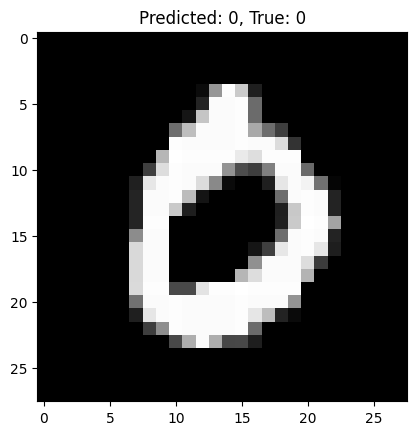

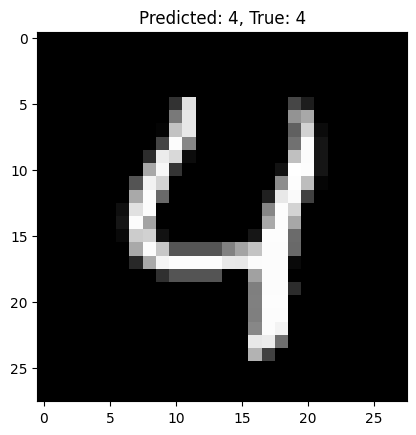

In [18]:
import matplotlib.pyplot as plt
import numpy as np

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Step 8: Plot training history
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Step 9: Test with some predictions
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.show()